# MTI830 

Projet de session 

Équipe: 
- Marie-Philippe Gill
- Félix Blier 

## Data

The dataset was first introduced by [\[2\] Goetz et al.](https://onlinelibrary.wiley.com/doi/full/10.1002/mds.22379), and the dataset was shared by [\[1\] Tsanas et al.](https://ieeexplore.ieee.org/abstract/document/5339170) on [data.world](https://data.world/uci/parkinsons-telemonitoring/workspace/project-summary?agentid=uci&datasetid=parkinsons-telemonitoring).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
df = pd.read_csv('https://query.data.world/s/pmiss3v44x4dmyrplzrsjo7coaehfc')
df = df.rename(columns={"subject#": "subject_id"})

In [3]:
df

,subject_id,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.64310,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.160060
1,1,72,0,12.66600,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.108100
2,1,72,0,19.68100,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.210140
3,1,72,0,25.64700,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.332770
4,1,72,0,33.64200,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.193610
5,1,72,0,40.65200,29.435,36.870,0.00353,0.000023,0.00119,0.00159,...,0.214,0.01006,0.01337,0.02263,0.03019,0.009438,22.946,0.53949,0.57243,0.195000
6,1,72,0,47.64900,29.682,37.363,0.00422,0.000024,0.00212,0.00221,...,0.445,0.02376,0.02621,0.03488,0.07128,0.013260,22.506,0.49250,0.54779,0.175630
7,1,72,0,54.64000,29.928,37.857,0.00476,0.000025,0.00226,0.00259,...,0.212,0.00979,0.01462,0.01911,0.02937,0.027969,22.929,0.47712,0.54234,0.238440
8,1,72,0,61.66900,30.177,38.353,0.00432,0.000029,0.00156,0.00207,...,0.371,0.01774,0.02134,0.03451,0.05323,0.013381,22.078,0.51563,0.61864,0.200370
9,1,72,0,68.68800,30.424,38.849,0.00496,0.000027,0.00258,0.00253,...,0.310,0.02030,0.01970,0.02569,0.06089,0.018021,22.606,0.50032,0.58673,0.201170


## Objective 1: Data understanding

- `Subject#` : Subject id 
- `age`: Age 
- `test_time`: Time since recruitment into the trial. The integer part is the number of days since recruitment.

The data use UPDRS scores as the gold standart. You can see an example of UPDRS questionnaire [here](https://img.medscape.com/fullsize/701/816/58977_UPDRS.pdf).

- `motor_UPDRS`: Clinician's motor UPDRS score, linearly interpolated. It refers to UPDRS-III, which are questions 18 to 31 in the UPDRS test. The minimum of points is 0 and maximum is 56 as the answers range from 0 to 4 points.

- `total_UPDRS`: Clinician's total UPDRS score, linearly interpolated. The total points of UPDRS can go from 0 to 199 points. 

The 16 following are biomedical voice measures. [1]

Jitter : Cycle-to-cycle variability in F0

- `Jitter(%)` : Jitter as a percentage
- `Jitter(Abs)`: Absolute jitter in microseconds
- `Jitter:RAP`: Relative amplitude perturbation
- `Jitter:PPQ5`: Five point period perturbation quotient
- `Jitter:DDP`: Differences between cycles, divided by the average periode

Shimmer : Cycle-to-cycle variability amplitude

- `Shimmer`: Local shimemr
- `Shimmer(dB)`: Local shimemr in decibels
- `Shimmer:APQ3`: Three point Amplitude Perturbation Quotient
- `Shimmer:APQ5`: TFive point Amplitude Perturbation Quotient
- `Shimmer:APQ11`: 11-point Amplitude Perturbation Quotient
- `Shimmer:DDA`: Difference between the amplitudes od consecutive periods

HArmonic and noise ratio
- `NHR`: Harmonics-to-noise ratio
- `HNR`: Noise-to-harmonics ratio

Speech signal processing methods
- `RPDE`: Recurence period density entropy is the ability of the vocal folds to sustain simple vibration
- `DFA`: Detrended fluctuation analysis is the extent of turbulent noise in the speech
signal
- `PPE`: Pitch period entropy is the impaired control of stable pitch during sustained phonation 

There were 5,875 voice recordings. The aim of the provided dataset is to predict the motor and total UPDRS score from the 16 voice measures. 

Recordings are made at home using an At-Home Testing Device (AHTD).

The speech test is designed to take 4 minutes to execute.

The test is executed weekly.

The speech test is composed of three processes : 
- 4 decay of normal intensity phonation for maximally sustained ‘‘Ah’’ phonation [1]
- 2 decay of loud intensity (twice the normal intensity) phonation for maximallysustained ‘‘Ah’’ [1]
- Intensity decays for descriptions of standardized pictures with and without ﬁnger tap-ping motor distraction. [2]

The patients in this study were in early-stage and unmedicated Parkinson's Disease patients. 

52 patients were enrolled in the study, but only 50 completed the 6-month period. From those, 48 remained without medication. 

The initial study reported "UPDRS motor scores significantly worsened over the 6 months" [2].

### Questions à répondre

- C'est quoi "linaerly interpolated', je comprends pas comment ça a été utilisé. Est-ce dans le modèle de régression utilisé par l'étude? : Ça signifie que le score motor UPDRS est proportiellement linéaire à la gravité de la maladie du patient (un patient ayant un score UPDRS de fois plus levé sera 2 fois plus touché par la maladie qu'un autre patient).


## Data Visualization

### Exploration des attributs et de leurs valeurs 

- Attributs qualitatifs : nominal, binaire, ordinal ? 
- Quantitatif : discret, continu ? 

Qualitatif :
    - Binaire : sex
    - Nominal : subject_id, age
Discrètes :
    - discret : tous les autres attributs

### Mesures de tendance centrale 

Comme mentionné dans le cours 4, il est toujours intéressant de s'informer sur notre dataset en utilisant des mesures de tendances centrales, en utilisant par exemple : 
- Moyenne
- médiane
- mode
- mid-range (moyenne entre le min et le max)
- variance
- écart type 

Comme notre dataset est contenu dans un `DataFrame`, en python, on peut utiliser l'attribut `.describe()` pour obtenir ces informations sur les features de notre dataset.

In [5]:
df.sex.value_counts()

0    4008
1    1867
Name: sex, dtype: int64

La base de donnée contien 4008 enregistrements masculins et 1867 enregistrement féminins

In [3]:
df.describe()

,subject_id,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
count,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,...,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000
mean,21.494128,64.804936,0.317787,92.863722,21.296229,29.018942,0.006154,0.000044,0.002987,0.003277,...,0.310960,0.017156,0.020144,0.027481,0.051467,0.032120,21.679495,0.541473,0.653240,0.219589
std,12.372279,8.821524,0.465656,53.445602,8.129282,10.700283,0.005624,0.000036,0.003124,0.003732,...,0.230254,0.013237,0.016664,0.019986,0.039711,0.059692,4.291096,0.100986,0.070902,0.091498
min,1.000000,36.000000,0.000000,-4.262500,5.037700,7.000000,0.000830,0.000002,0.000330,0.000430,...,0.026000,0.001610,0.001940,0.002490,0.004840,0.000286,1.659000,0.151020,0.514040,0.021983
25%,10.000000,58.000000,0.000000,46.847500,15.000000,21.371000,0.003580,0.000022,0.001580,0.001820,...,0.175000,0.009280,0.010790,0.015665,0.027830,0.010955,19.406000,0.469785,0.596180,0.156340
50%,22.000000,65.000000,0.000000,91.523000,20.871000,27.576000,0.004900,0.000035,0.002250,0.002490,...,0.253000,0.013700,0.015940,0.022710,0.041110,0.018448,21.920000,0.542250,0.643600,0.205500
75%,33.000000,72.000000,1.000000,138.445000,27.596500,36.399000,0.006800,0.000053,0.003290,0.003460,...,0.365000,0.020575,0.023755,0.032715,0.061735,0.031463,24.444000,0.614045,0.711335,0.264490
max,42.000000,85.000000,1.000000,215.490000,39.511000,54.992000,0.099990,0.000446,0.057540,0.069560,...,2.107000,0.162670,0.167020,0.275460,0.488020,0.748260,37.875000,0.966080,0.865600,0.731730


Ainsi, on peut constater que notre dataset contient 5875 enregistrements pour 42 patients différents. 

Ceux-ci ont en moyenne 64.8 ans. Le patient le plus jeune a 36 ans, et le plus vieux a 85 ans. 

La moyenne d'age est assez près du entre qui est 60.5 ans. L'écart type est quand à elle assez élevée.

Il est intéressant de visualiser la distribution de l'age des patients grace a un histogramme.

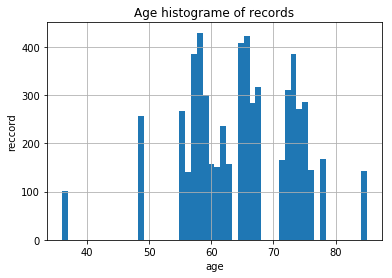

In [7]:
df.hist('age', bins=52,)

plt.ylabel('reccord')
plt.xlabel('age')
plt.title('Age histograme of records')

plt.show()

Dans l'histogramme, l'axe des abscisse représente l'age du patient et l'axe des ordonnées, le nombre d'enregistrement.

On observe ici que la plupart des patients ont pres de 58 ans, 65 ans et 75 ans.

L'histogramme des résultats des test UPDRS donne aussi une idée sur l'etat des patients

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000262CA609630>]],
      dtype=object)

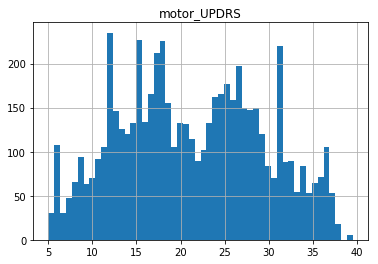

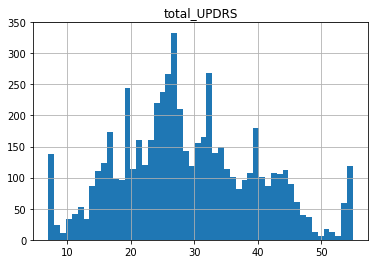

In [27]:
df.hist('motor_UPDRS', bins=52)

df.hist('total_UPDRS', bins=52)

Dans l'histogramme, l'axe des abscisse représente l'age du patient et l'axe des ordonnées, le nombre d'enregistrement.

Le score total de UPDRS semble suivre une loi normale de moyenne 30 


## QQ Plot

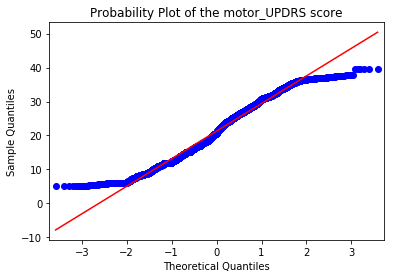

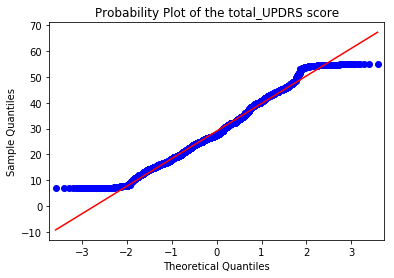

In [14]:
import numpy as np 
import statsmodels.api as sm 
import pylab as py 

sm.qqplot(df['motor_UPDRS'], line='s') 
py.title('Probability Plot of the motor_UPDRS score')

sm.qqplot(df['total_UPDRS'], line='s') 
py.title('Probability Plot of the total_UPDRS score')

py.show() 

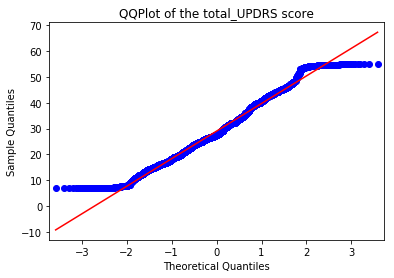

In [11]:
sm.qqplot(df['total_UPDRS'], line='s') 
py.title('QQPlot of the total_UPDRS score')
py.show() 

## Bloxplot - Données aberrantes 

In [4]:
print(df.keys())

Index(['subject_id', 'age', 'sex', 'test_time', 'motor_UPDRS', 'total_UPDRS',
       'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP',
       'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE'],
      dtype='object')


([<matplotlib.axis.XTick at 0x2514dd075f8>],
 <a list of 1 Text xticklabel objects>)

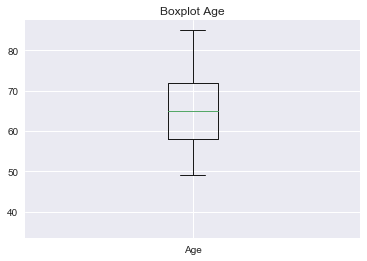

In [71]:
import numpy as np 
import matplotlib.pyplot as plt
x1 = df.age
x2 = df.test_time

data = [x1]
#data = [x1, x2, x3, x4, x5, x6, x7, x8, x9]

fig1, ax1 = plt.subplots()
ax1.set_title('Boxplot Age')
ax1.boxplot(data)
plt.xticks([1], ['Age'])

([<matplotlib.axis.XTick at 0x7fa38821d860>],
 <a list of 1 Text xticklabel objects>)

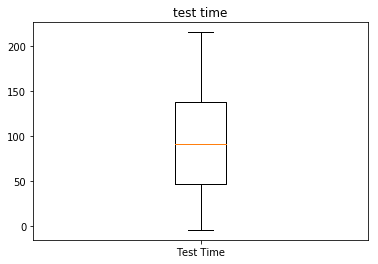

In [16]:
import numpy as np 
import matplotlib.pyplot as plt
x1 = df.age
x2 = df.test_time

data = [x2]
#data = [x1, x2, x3, x4, x5, x6, x7, x8, x9]

fig1, ax1 = plt.subplots()
ax1.set_title('test time')
ax1.boxplot(data)
plt.xticks([1], ['Test Time'])

([<matplotlib.axis.XTick at 0x7fa386e214a8>,
 <a list of 2 Text xticklabel objects>)

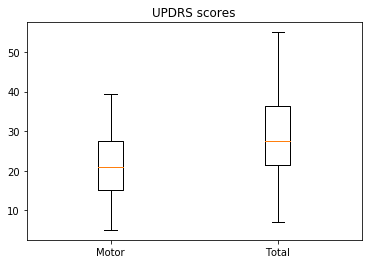

In [5]:
import numpy as np 
import matplotlib.pyplot as plt
x1 = df.motor_UPDRS
x2 = df.total_UPDRS

data = [x1,x2]
#data = [x1, x2, x3, x4, x5, x6, x7, x8, x9]

fig1, ax1 = plt.subplots()
ax1.set_title('UPDRS scores')
ax1.boxplot(data)
plt.xticks([1, 2], ['Motor', 'Total'])

([<matplotlib.axis.XTick at 0x7fa38922a6a0>,
 <a list of 6 Text xticklabel objects>)

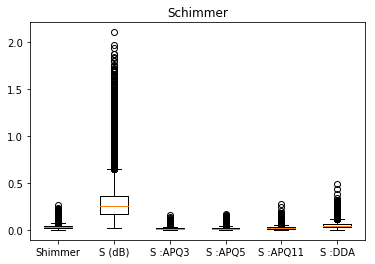

In [21]:
# Schimmer

data = [df['Shimmer'],df['Shimmer(dB)'], df['Shimmer:APQ3'], df['Shimmer:APQ5'], df['Shimmer:APQ11'], df['Shimmer:DDA']]
#data = [x1, x2, x3, x4, x5, x6, x7, x8, x9]

fig1, ax1 = plt.subplots()
ax1.set_title('Schimmer')
ax1.boxplot(data)
plt.xticks([1, 2, 3, 4, 5, 6], ['Shimmer', 'S (dB)', 'S :APQ3', 'S :APQ5', 'S :APQ11', 'S :DDA'])

([<matplotlib.axis.XTick at 0x7fa389026320>,
 <a list of 5 Text xticklabel objects>)

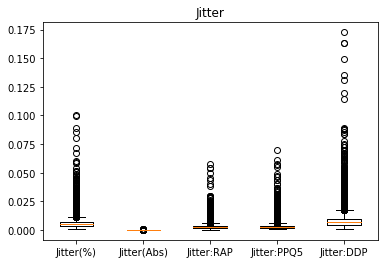

In [20]:
# Jitter

data = [df['Jitter(%)'],df['Jitter(Abs)'], df['Jitter:RAP'], df['Jitter:PPQ5'], df['Jitter:DDP']]

fig1, ax1 = plt.subplots()
ax1.set_title('Jitter')
ax1.boxplot(data)
plt.xticks([1, 2, 3, 4, 5], ['Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP'])

([<matplotlib.axis.XTick at 0x7fa388175780>,
 <a list of 5 Text xticklabel objects>)

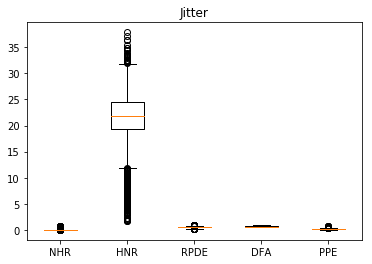

In [24]:
data = [df['NHR'],df['HNR'], df['RPDE'], df['DFA'], df['PPE']]

fig1, ax1 = plt.subplots()
ax1.set_title('Jitter')
ax1.boxplot(data)
plt.xticks([1, 2, 3, 4, 5], ['NHR', 'HNR', 'RPDE', 'DFA', 'PPE'])

### Motor UPDRS Score Over time since recruitment in the study for the subjects  

2.2.2


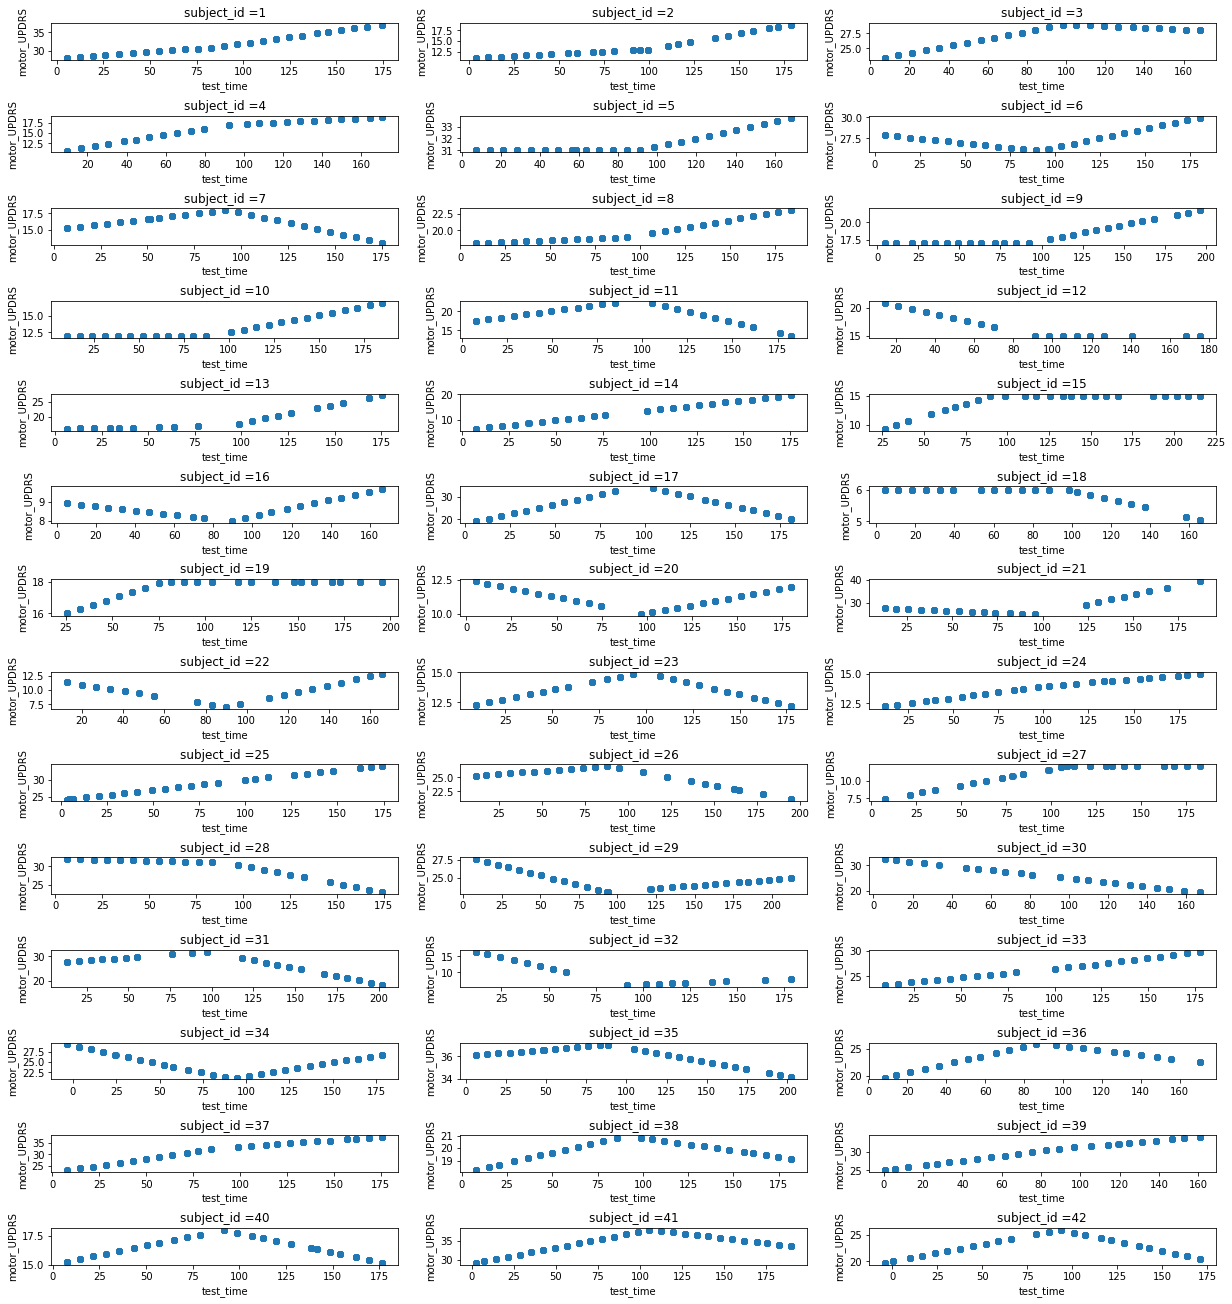

In [5]:
# Source of the code for the subplots:
# https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/markevery_demo.html#sphx-glr-gallery-lines-bars-and-markers-markevery-demo-py

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib
print(matplotlib.__version__)

# define the figure size and grid layout properties
figsize = (17,18)
cols = 3
rows = 14
# define the data for cartesian plots
# delta = 0.11
# x = np.linspace(0, 10 - 2 * delta, 200) + delta
# y = np.sin(x) + 1.0 + delta


def trim_axs(axs, N):
    """little helper to massage the axs list to have correct length..."""
    axs = axs.flat
    for ax in axs[N:]:
        ax.remove()
    return axs[:N]

fig2, axs = plt.subplots(rows, cols, figsize=figsize, constrained_layout=True)
axs = trim_axs(axs, 42)
for ax, subject_id in zip(axs, range(1,43)):
    ax.set_title('subject_id =%s' % str(subject_id))
    ax.set_xlabel('test_time')
    ax.set_ylabel('motor_UPDRS')
#     ax.set_xscale('log')
#     ax.set_yscale('log')
    ax.scatter((df[df['subject_id'] == subject_id].test_time), (df[df['subject_id'] == subject_id].motor_UPDRS))
fig2.savefig('motor_updrs_time_test.png')

The next plots are showing for every subject, their motor UPDRS over the time since they were recruited into the trial. The X axis represents the number of days since the recruitment (`test_time`) and the Y axis is their `motor_UPDRS`. 

At first, I would have expected the motor UPDRS score to worsen over time as this is what would happen in a degenerative disease. However, ****REF**** noted that for some patients, surprisingly, their motor UPDRS is actually worsening in the middle of the experiments (at the 3 months visit) and then improving tremendously at the 6-months evaluation of the UPDRS score. 

Generating those graphs makes me want to go further in this analysis and actually quantify how many patients:

- How many patients worsen from the beginning to the end of the study? 
- How many improved ? 



<font color='red'>TODO FÉlix: As-tu une idée pourquoi un patient aurait deux fois la même valeur dans test_time? Le patient 1 a deux fois la même valeur minimum. Par contre, les features vocales n'ont pas les mêmes valeurs</font>

In [56]:
nb_subjects_worsen = 0
nb_subjects_improved = 0 
nb_subjects_midpoint_worst_end_well = 0 

# Go through all the 42 subject_id of the dataset 
for subject_id in range(1,43):
#     print('Subject_id : ', subject_id)
    # Filter the dataframe to only the recordings of the current subject 
    subject_df = df[(df['subject_id'] == subject_id)]

    # Then we will filter another time the subject_df because we want the value of the motor UPDRS
    # when test_time is at its minimum, median and max value
    min_subject_df = subject_df[subject_df['test_time'] == subject_df['test_time'].min()]
    #display(min_subject_df)
    min_value = min_subject_df.motor_UPDRS.values[0]
    #print('Min : ', min_value)

    # Median uses row nearest to midpoint because otherwise median is a problem on dataframes of even length
    median_subject_df = subject_df[subject_df['test_time'] == subject_df['test_time'].quantile(interpolation='nearest')]
    #display(median_subject_df)
    median_value = median_subject_df.motor_UPDRS.values[0]
    #print('Median : ', median_value)
    
    max_subject_df = subject_df[subject_df['test_time'] == subject_df['test_time'].max()]
    #display(max_subject_df)
    max_value = max_subject_df.motor_UPDRS.values[0]
    #print('Max : ', max_value)
    
    if(min_value < max_value):
        nb_subjects_worsen += 1
    elif(max_value < min_value):
        nb_subjects_improved += 1
    if(median_value > max_value):
        nb_subjects_midpoint_worst_end_well += 1
    
print('Nb subjects who got worst between start and the end of the trial: ', nb_subjects_worsen)
print('Nb subjects who are even better than when they started the trial : ', nb_subjects_improved)
print('Nb subjects who improved between midpoint and end : ', nb_subjects_midpoint_worst_end_well)

Nb subjects who got worst between start and the end of the trial:  27
Nb subjects who are even better than when they started the trial :  15
Nb subjects who improved between midpoint and end :  17


### Total UPDRS Score Over time since recruitment in the study for the subjects  

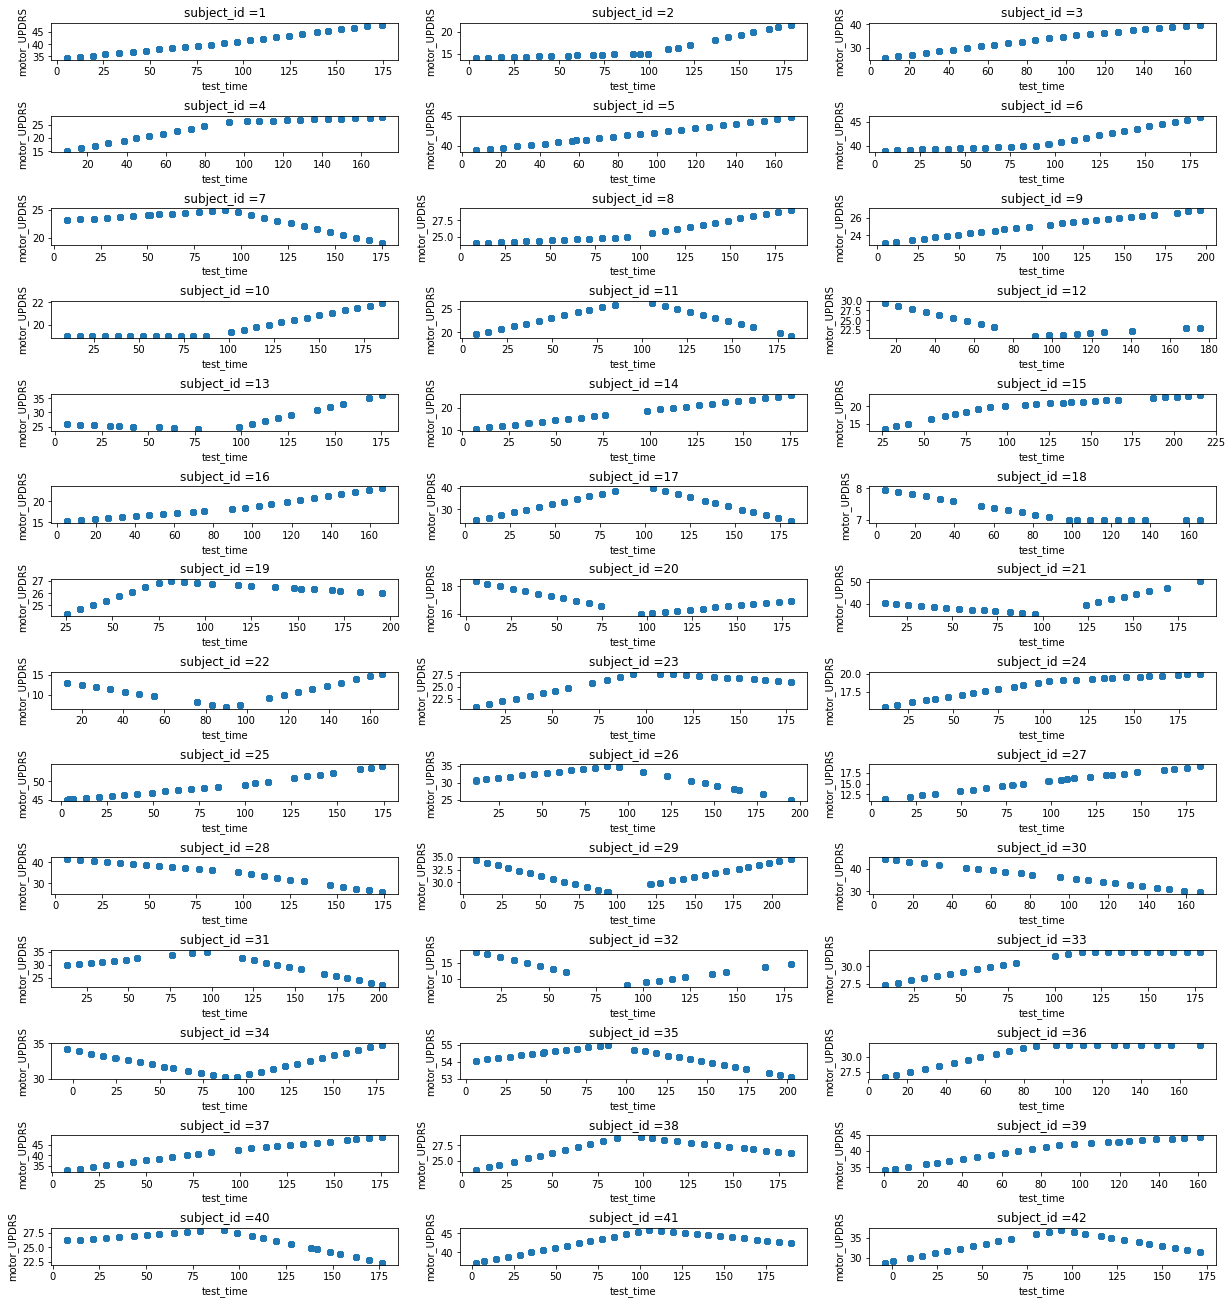

In [58]:
fig2, axs = plt.subplots(rows, cols, figsize=figsize, constrained_layout=True)
axs = trim_axs(axs, 42)
for ax, subject_id in zip(axs, range(1,43)):
    ax.set_title('subject_id =%s' % str(subject_id))
    ax.set_xlabel('test_time')
    ax.set_ylabel('motor_UPDRS')
#     ax.set_xscale('log')
#     ax.set_yscale('log')
    ax.scatter((df[df['subject_id'] == subject_id].test_time), (df[df['subject_id'] == subject_id].total_UPDRS))
fig2.savefig('total_updrs_time_test.png')

In [57]:
nb_subjects_worsen = 0
nb_subjects_improved = 0 
nb_subjects_midpoint_worst_end_well = 0 

# Go through all the 42 subject_id of the dataset 
for subject_id in range(1,43):
#     print('Subject_id : ', subject_id)
    # Filter the dataframe to only the recordings of the current subject 
    subject_df = df[(df['subject_id'] == subject_id)]

    # Then we will filter another time the subject_df because we want the value of the motor UPDRS
    # when test_time is at its minimum, median and max value
    min_subject_df = subject_df[subject_df['test_time'] == subject_df['test_time'].min()]
    #display(min_subject_df)
    min_value = min_subject_df.total_UPDRS.values[0]
    #print('Min : ', min_value)

    # Median uses row nearest to midpoint because otherwise median is a problem on dataframes of even length
    median_subject_df = subject_df[subject_df['test_time'] == subject_df['test_time'].quantile(interpolation='nearest')]
    #display(median_subject_df)
    median_value = median_subject_df.total_UPDRS.values[0]
    #print('Median : ', median_value)
    
    max_subject_df = subject_df[subject_df['test_time'] == subject_df['test_time'].max()]
    #display(max_subject_df)
    max_value = max_subject_df.total_UPDRS.values[0]
    #print('Max : ', max_value)
    
    if(min_value < max_value):
        nb_subjects_worsen += 1
    elif(max_value < min_value):
        nb_subjects_improved += 1
    if(median_value > max_value):
        nb_subjects_midpoint_worst_end_well += 1
    
print('Nb subjects who got worst between start and the end of the trial: ', nb_subjects_worsen)
print('Nb subjects who are even better than when they started the trial : ', nb_subjects_improved)
print('Nb subjects who improved between midpoint and end : ', nb_subjects_midpoint_worst_end_well)

Nb subjects who got worst between start and the end of the trial:  29
Nb subjects who are even better than when they started the trial :  13
Nb subjects who improved between midpoint and end :  16


### Combien de recordings par patient?

Le nombre d'enregistrements que l'on possède par patient peut être très déterminant. En effet, l'ensemble de données sur lequel on travaille est dans le domaine de la santé, alors les résultats sont très en relation avec le patient. 

C'est pour cette raison que nous nous sommes demandés combien d'enregistrements avons-nous pour chaque patient? La prochaine cellule contient de l'information à ce sujet. 

In [5]:
patient_frequency = df.subject_id.value_counts()
df_patient_frequency = pd.DataFrame({'subject_id':patient_frequency.index, 'count':patient_frequency.values})
df_patient_frequency

,subject_id,count
0,29,168
1,41,165
2,35,165
3,7,161
4,34,161
5,6,156
6,5,156
7,24,156
8,9,152
9,42,150


Grâce à `describe()` encore une fois, on peut analyser justement le nombre d'enregistrements par patients. En moyenne, les patients on 139 enregistrement. Le minimum d'enregistrements qu'un patient possède est 101, ce qui est une bonne nouvelle, puisque le nombre d'enregistrments ne varie pas trop d'un patient à l'autre. Le maximum d'enregistrements pour un patient est de 168. 

In [6]:
df.subject_id.value_counts().describe()

count     42.000000
mean     139.880952
std       15.542550
min      101.000000
25%      130.000000
50%      141.000000
75%      149.750000
max      168.000000
Name: subject_id, dtype: float64

## Objective 2: Data analysis 

### Is there a correlation between the age of the patients and their motor UPDRS score or total score?

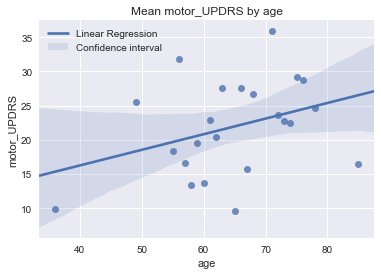

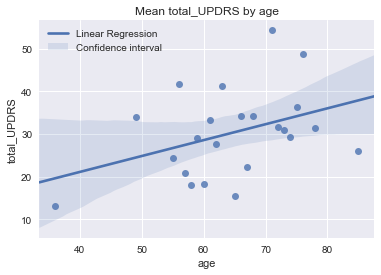

In [143]:
import seaborn as sns; sns.set()
dfage=df.groupby('age',as_index=False).mean()

ax=sns.regplot(x='age',y='motor_UPDRS', data=dfage, line_kws={'label':"Linear Regression"})
ax.collections[1].set_label('Confidence interval')
plt.title('Mean motor_UPDRS by age')
plt.legend()
plt.show()
ax=sns.regplot(x='age',y='total_UPDRS', data=dfage, line_kws={'label':"Linear Regression"})
ax.collections[1].set_label('Confidence interval')
plt.title('Mean total_UPDRS by age')
plt.legend()
plt.show()

### Is there a correlation between the sex of the patient and their motor UPDRS score or total score?

In [67]:
df.groupby('sex',as_index=False).mean()

,sex,subject_id,age,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,0,19.072106,65.055389,93.221349,21.469349,29.724055,0.005956,0.000048,0.002824,0.003053,...,0.302085,0.016750,0.019407,0.027162,0.050249,0.025269,21.679985,0.552449,0.661229,0.225827
1,1,26.693626,64.267274,92.095983,20.924581,27.505234,0.006577,0.000036,0.003338,0.003758,...,0.330013,0.018027,0.021727,0.028165,0.054081,0.046827,21.678445,0.517910,0.636088,0.206197


### Can we identify some clusters in the data? (Différence de variabilité entre les échantillons)

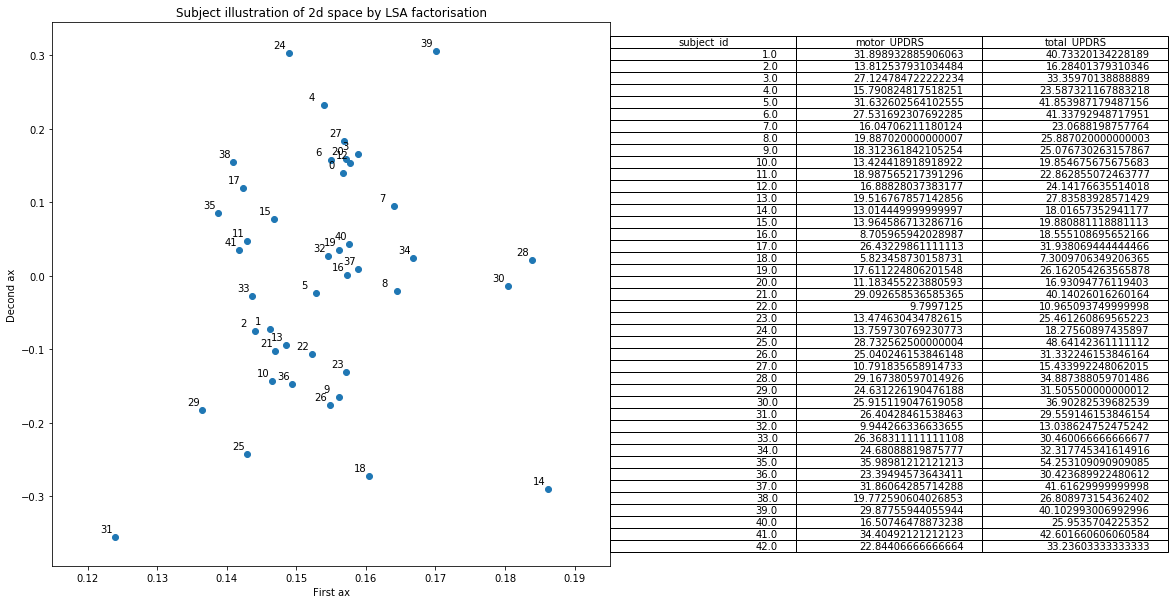

In [55]:
#Moyenne des enregistrement des sujets
Mean=df.groupby('subject_id',as_index=False, ).mean()

#Retirer les données non désirées
X=Mean.drop(columns=['motor_UPDRS','total_UPDRS','subject_id'])

#Application lDA
X=X.transpose()
model_LSA = TruncatedSVD(n_components=2)
U = model_LSA.fit_transform(X)
V = model_LSA.components_

#Représentation
plt.figure(figsize=(10, 10))
plt.scatter(V[0,:],V[1,:])
plt.title("Subject illustration of 2d space by LSA factorisation")
plt.xlabel('First ax')
plt.ylabel('Decond ax')
for i, files_name in enumerate(V[0,:]):
    plt.annotate(i, (V[0,i], V[1,i]), textcoords="offset points", xytext=(-15,5)) 
plt.table(cellText=Mean[['subject_id','motor_UPDRS','total_UPDRS']].values, 
          colLabels=['subject_id','motor_UPDRS','total_UPDRS'], loc='right')
plt.show()



# Objective 3: Modélisation

Can we predict the motor UPDRS (or total) score from 16 vocal features?

### Cross validation

TODO

## Évaluation des résultats

TODO


### Questions de recherche 

- Y a-t-il un lien entre l'âge du patient et le résultat aux tests?
Hypothèse: Il devrait effectivement y avoir un lien, assumant que les patients plus âgés ont un score plus élevé au test.
 


## References

[1] Tsanas, A., Little, M. A., McSharry, P. E., & Ramig, L. O. (2009). Accurate telemonitoring of Parkinson's disease progression by noninvasive speech tests. IEEE transactions on Biomedical Engineering, 57(4), 884-893.

[2] Goetz, C. G., Stebbins, G. T., Wolff, D., DeLeeuw, W., Bronte‐Stewart, H., Elble, R., ... & Wu, A. D. (2009). Testing objective measures of motor impairment in early Parkinson's disease: Feasibility study of an at‐home testing device. Movement Disorders, 24(4), 551-556.

# Drafts

In [ ]:
figsize = (14,15)
cols = 3
rows = 3

fig2, axs = plt.subplots(rows, cols, figsize=figsize, constrained_layout=True)
axs = trim_axs(axs, 42)
for ax, subject_id in zip(axs, range(34,43)):
    ax.set_title('subject_id =%s' % str(subject_id))
    ax.set_xlabel('test_time')
    ax.set_ylabel('motor_UPDRS')
#     ax.set_xscale('log')
#     ax.set_yscale('log')
    ax.scatter((df[df['subject_id'] == subject_id].test_time), (df[df['subject_id'] == subject_id].motor_UPDRS))